## Boston AirBNB Blog Post Code

In this project, Data Science steps are applied to analyze the Boston AirBNB dataset and answer the below questions about the data inside:

1. When was the most expensive month to rent in Boston ?
2. What is the average availability each month ?
3. What is the most used cancelation policy in Boston ?
4. What is the average review score for Boston residences ?
5. Is the reviews correlated with the price ?

So, we will need a series of steps to achieve our results

#### Step 1: Import Libraries and load datasets

In [384]:
#Step 1: Import Libraries and load datasets

import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import calendar
%matplotlib inline

calendar_raw = pd.read_csv('calendar.csv')
listings_raw = pd.read_csv('listings.csv')
reviews_raw = pd.read_csv('reviews.csv')

#### Step 2: Gather necessary data to answer your questions and understand its structure

In [376]:
#Step 2: Gather necessary data to answer your questions and understand its structure
#Calendar
calendar_raw.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [8]:
# Check types of columns
calendar_raw.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [6]:
# Check the number of columns
calendar_raw.shape

(1308890, 4)

In [9]:
#listings
listings_raw.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [12]:
listings_raw.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [11]:
listings_raw.shape

(3585, 95)

In [13]:
reviews_raw.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [14]:
reviews_raw.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [15]:
reviews_raw.shape

(68275, 6)

#### Step 3: Adjust data types & handle categorical and missing data

In [385]:
#Adjust price column data type (obj to float)
calendar_raw['price'] = calendar_raw['price'].str.replace("$","")
calendar_raw['price'] = calendar_raw['price'].str.replace(",","")
calendar_raw['price'] = calendar_raw['price'].astype(float)

In [386]:
#Adjust Available column data type (obj to boolean)
calendar_raw['available'] = calendar_raw['available'] == 't'

In [387]:
#Adjust date column data type (obj to date)
d1 = pd.to_datetime(calendar_raw['date'], format='%d-%m-%Y', errors='coerce')
d2 = pd.to_datetime(calendar_raw['date'], format='%Y-%m-%d', errors='coerce')

calendar_raw['date'] = d1.combine_first(d2)
calendar_raw['date'] = pd.to_datetime(calendar_raw['date'])

In [388]:
#Verify
calendar_raw.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

In [389]:
# Check for null values
calendar_raw.isnull().any()

listing_id    False
date          False
available     False
price          True
dtype: bool

In [390]:
# Handle null values (make price 0 for the null values since it is mostly correlated with non-available residences)
# We need to analyze availability so we cannot drop the Nans 
calendar_raw.price.fillna(0,inplace=True)

In [391]:
#Verify
calendar_raw.isnull().any()

listing_id    False
date          False
available     False
price         False
dtype: bool

In [393]:
#Add column to indicate month to extract monthly insights
calendar_raw['month']=calendar_raw['date'].apply(lambda x : x.replace(day=1))

In [395]:
calendar_raw.head() #Ready for Q1 and Q1:D

,listing_id,date,available,price,month
0,12147973,2017-09-05,False,0.0,2017-09-01
1,12147973,2017-09-04,False,0.0,2017-09-01
2,12147973,2017-09-03,False,0.0,2017-09-01
3,12147973,2017-09-02,False,0.0,2017-09-01
4,12147973,2017-09-01,False,0.0,2017-09-01


In [396]:
listings_raw['cancellation_policy'].value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [412]:
# Prepare the datasets for Q3 and Q4

#Calculate the mean price for each resident
calendar_prices = calendar_raw.groupby('listing_id', as_index=False)['price'].mean()
listings_prices = pd.merge(calendar_prices, listings_raw, left_on='listing_id', right_on='id')
listings_prices = listings_prices[['id','price_x','review_scores_value','cancellation_policy']]

#Extract cancelation policies and reviews in separate dateframes
listings_cancelp = listings_prices[['id','price_x','cancellation_policy']]
listings_reviews = listings_prices[['id','price_x','review_scores_value']].dropna()

#### Step 4: Analyze, Model, and Visualize

In [398]:
# Get the most expensive month to rent in Boston
calendar_maxPrice = calendar_raw.groupby('month', as_index=False)['price'].mean().sort_values(by='price',ascending=False)
print(calendar_maxPrice.iloc[0])

# Re-sort values and make the month the index for plotting of the data
calendar_maxPrice = calendar_maxPrice.sort_values(by='month')
calendar_maxPrice.set_index('month',inplace=True)
calendar_maxPrice

month    2016-11-01 00:00:00
price                111.078
Name: 2, dtype: object


,price
month,
2016-09-01,68.773887
2016-10-01,97.311012
2016-11-01,111.078388
2016-12-01,105.681045
2017-01-01,103.893870
2017-02-01,102.386224
2017-03-01,90.251876
2017-04-01,94.211266
2017-05-01,93.400671


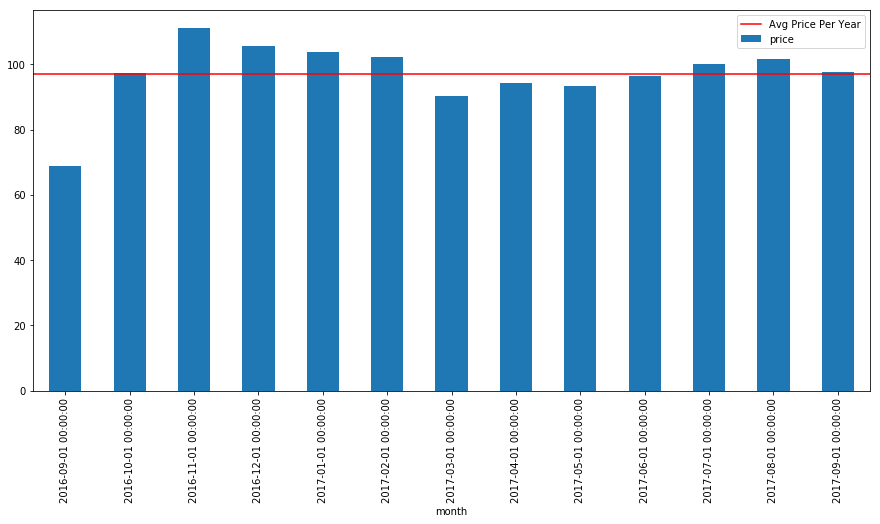

In [252]:
# Plot the rate of prices throughout the year and show the Avg Price
fig, ax = plt.subplots(figsize=(15,7))
calendar_maxPrice['price'].plot(kind='bar',ax=ax)
plt.axhline(calendar_maxPrice['price'].mean(),color='r',label='Avg Price Per Year')
ax.legend()

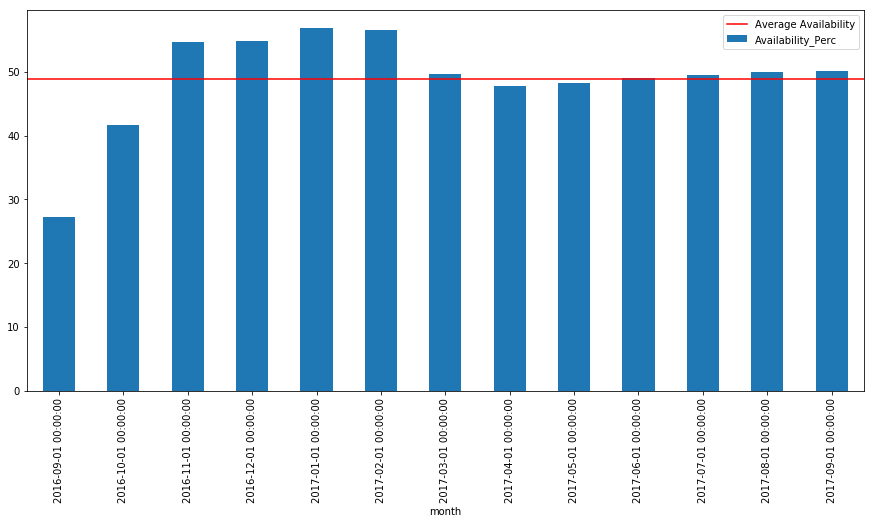

In [399]:
# Get and plot the availability throughout the year
calendar_avail = calendar_raw.groupby('month')['available'].value_counts(normalize=True).mul(100).rename(index='Availability_Perc').reset_index()
calendar_avail = calendar_avail[calendar_avail['available']==True]
calendar_avail.set_index('month',inplace=True)
fig, ax = plt.subplots(figsize=(15,7))
calendar_avail[['Availability_Perc']].plot(kind='bar',ax=ax)
plt.axhline(calendar_avail['Availability_Perc'].mean(),color='r',label='Average Availability')
ax.legend()

In [413]:
cancels = listings_cancelp['cancellation_policy'].value_counts()
cancels

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

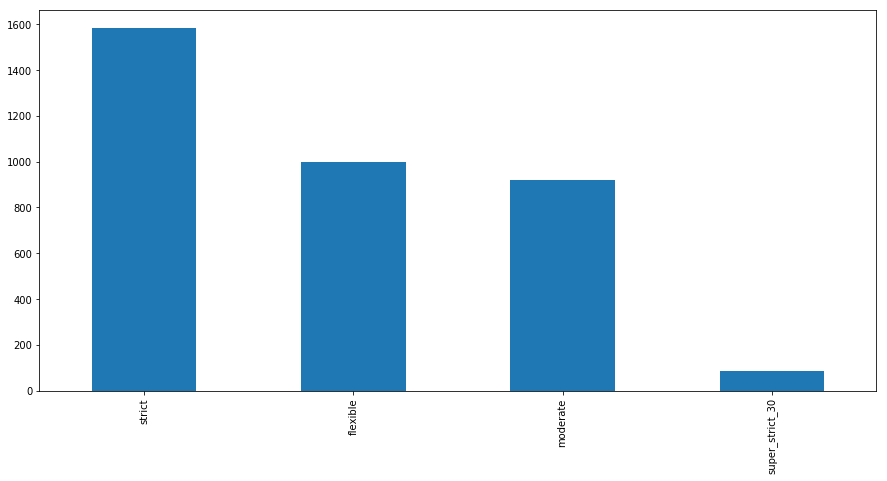

In [414]:
# Find the cancellation policy in all residences and show the mostly used
fig, ax = plt.subplots(figsize=(15,7))
cancels.plot(kind='bar',ax=ax)

In [416]:
# Correlating the price with the cancelation polices 
#by calculating the mean price for the residences that have same cancelation polices
cancels_prices = listings_cancelp.groupby('cancellation_policy')['price_x'].mean().sort_values()
cancels_prices = cancels_prices.to_frame()

# Re-sort values for plotting
cancels_prices = cancels_prices.reset_index().sort_values(by='cancellation_policy',ascending=False)
cancels_prices.set_index('cancellation_policy',inplace=True)
cancels_prices

,price_x
cancellation_policy,
super_strict_30,311.509589
strict,127.279007
moderate,75.873803
flexible,52.040890


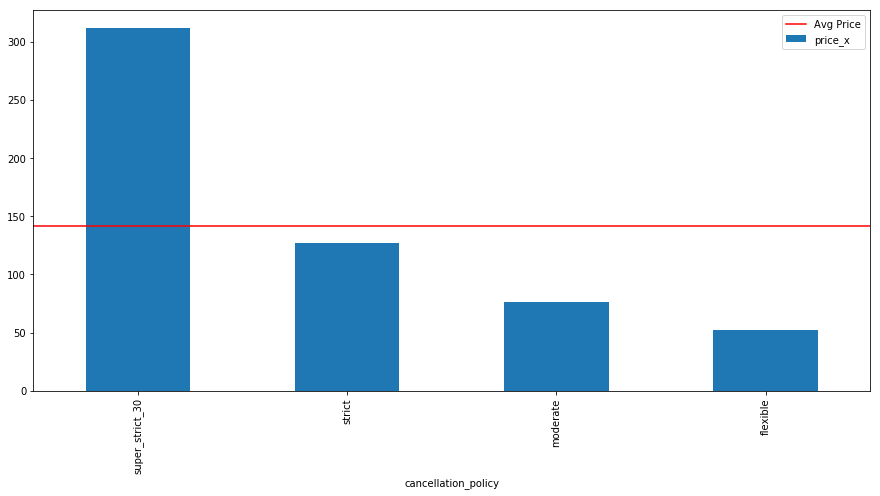

In [418]:
# Plot the values to show the prices cancelation policies correlation
fig, ax = plt.subplots(figsize=(15,7))
cancels_prices.plot(kind='bar',ax=ax)
plt.axhline(cancels_prices['price_x'].mean(),color='r',label='Avg Price')
ax.legend()

In [321]:
# Calculate the average review score for Boston Residences
listings_reviews['review_scores_value'].mean()

9.16823444283647

In [323]:
# Show the reviews for the residences in Boston
reviews_counts = listings_reviews['review_scores_value'].value_counts()
reviews_counts

10.0    1177
9.0     1130
8.0      334
7.0       51
6.0       49
4.0       12
2.0        7
3.0        2
5.0        2
Name: review_scores_value, dtype: int64

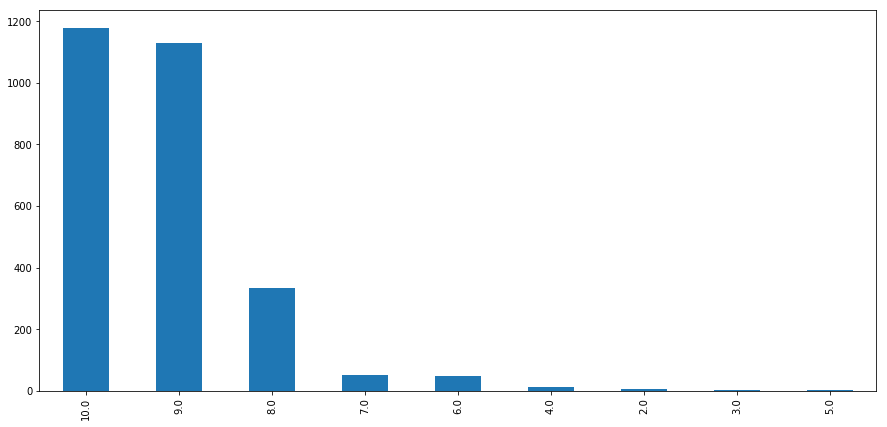

In [324]:
# Plot the reviews to view how much customers are satisfied in Boston residences rentals.
fig, ax = plt.subplots(figsize=(15,7))
reviews_counts.plot(kind='bar',ax=ax)

In [409]:
# Correlating the price with the reviews by calculating the mean price for the residences that have same review score
reviews_prices = listings_reviews.groupby('review_scores_value')['price_x'].mean().sort_values()
reviews_prices = reviews_prices.to_frame()

# Re-sort values for plotting
reviews_prices = reviews_prices.reset_index().sort_values(by='review_scores_value',ascending=False)
reviews_prices.set_index('review_scores_value',inplace=True)
reviews_prices

,price_x
review_scores_value,
10.0,82.638924
9.0,106.245758
8.0,126.158510
7.0,96.216761
6.0,86.007269
5.0,28.924658
4.0,83.265068
3.0,33.498630
2.0,101.473581


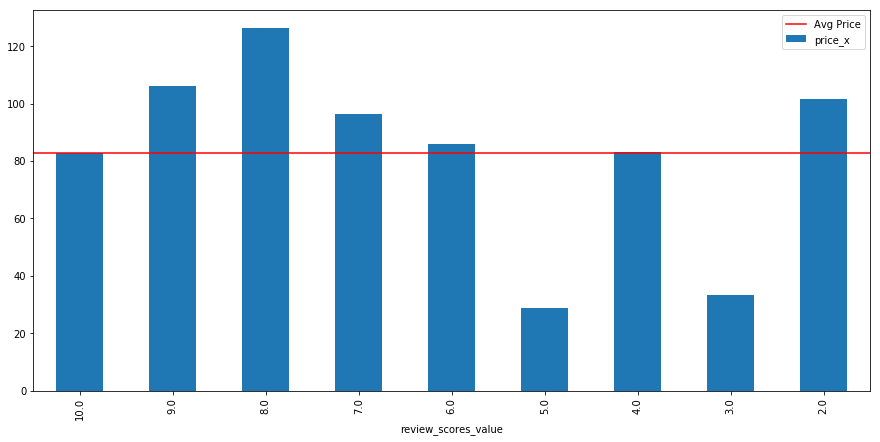

In [411]:
# Plot the values to show the prices reviews correlation
fig, ax = plt.subplots(figsize=(15,7))
reviews_prices.plot(kind='bar',ax=ax)
plt.axhline(reviews_prices['price_x'].mean(),color='r',label='Avg Price')
ax.legend()